# Correlation, Regression, and Least Squares

## 1. Evaluating NBA Game Predictions


#### A brief introduction to sports betting
In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team," and the other team is called the "away team."  The winner is the team with the most points.

We can summarize what happened in a game by the "**outcome**", defined as the **the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won. 

Casinos in Las Vegas offer bets on the outcomes of NBA games.  One kind of bet works like this:

1. The casino decides on a "spread."
2. You can bet \$11 that the outcome will be above the spread, or \$11 that the outcome will be below the spread.
3. After the game, you end up with \$21 if you guessed correctly, and \$0 if you guessed incorrectly.

The analysts at the casino try to choose the spread so that (according to their analysis of the teams) there is a 50% chance that the outcome will be below that amount, and a 50% chance that the outcome will be above that amount.

**[tl;dr](https://en.wikipedia.org/wiki/Wikipedia:Too_long;_didn%27t_read): The spread is the casino's best guess at the outcome (the away team's score minus the home team's score).**

The table `spreads` contains spreads from the betting website [Covers](http://www.covers.com) from every game in the 2014 NBA season, plus actual game outcomes.  

In [2]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

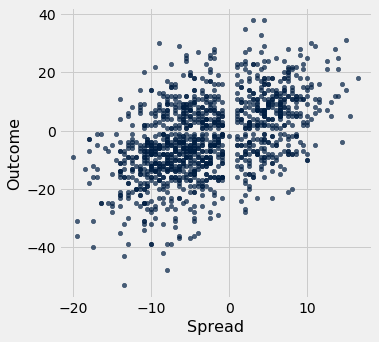

In [3]:
spreads.scatter("Spread", "Outcome")

#### Question 1
Why do you think that the spread and outcome are never 0 (aside from 1 case of the spread being 0)? 

The spread and outcome are never 0 as a basketball game cannot end in a tie, it will go into as many overtimes as necessary such that one team will have a greater score than the other.

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

#### Question 2
Among games with a spread between 3.5 and 6.5 (including both 3.5 and 6.5), what was the average outcome? 

*Hint:* Read the [documentation for the predicate `are.between_or_equal_to`](http://data8.org/datascience/predicates.html#datascience.predicates.are.between_or_equal_to).

In [4]:
spreads_around_5 = spreads.where("Spread", are.between_or_equal_to(3.5, 6.5))
spread_5_outcome_average = np.mean(spreads_around_5.column("Outcome"))
print("Average outcome for spreads around 5:", spread_5_outcome_average)

Average outcome for spreads around 5: 4.99411764706


In [5]:
_ = ok.grade('q1_2')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/31Bq54
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 3
If the average outcome for games with any given spread turned out to be exactly equal to that spread, what would the slope and intercept of the linear regression line be, in original units? Hint: If you're stuck, try drawing a picture!

In [6]:
expected_slope_for_equal_spread = 1
expected_intercept_for_equal_spread = 0

In [7]:
_ = ok.grade('q1_3')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/5yJv5q
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4
Fix the `standard_units` function below.  It should take an array of numbers as its argument and return an array of those numbers in standard units.

In [8]:
def standard_units(nums):
    """Return an array where every value in nums is converted to standard units."""
    return (nums - np.mean(nums))/np.std(nums)

In [9]:
_ = ok.grade('q1_4')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/0RvnQV
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 5
Compute the correlation between outcomes and spreads using the `standard_units` function.

In [10]:
outcome_su = standard_units(spreads.column("Outcome"))
spread_su = standard_units(spreads.column("Spread"))
spread_r = np.average(outcome_su * spread_su)
spread_r

0.49181413688314235

In [11]:
_ = ok.grade('q1_5')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/kR9xEr
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 6
Compute the slope of the least-squares linear regression line that predicts outcomes from spreads, in original units.

In [12]:
SD_y = np.std(spreads.column("Outcome"))
SD_x = np.std(spreads.column("Spread"))
spread_slope = spread_r * (SD_y/SD_x)
spread_slope

0.95392696822643275

In [13]:
_ = ok.grade('q1_6')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/n5nAKY
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 7
For the "best fit" line that estimates the average outcome from the spread, the slope is less than 1. Does knowing the slope alone tell you whether the average spread was higher than the average outcome? If so, set the variable name below to `True`. If you think you need more information than just the slope of the regression line to answer that question, then respond `False`. Briefly justify your answer below. (HINT: Does the intercept matter?)

In [14]:
slope_implies_average_spread_above_average_outcome = False

Even though the slope of the "best fit" line is less than 1, the slope is not enough to tell if the average spread is higher than the average outcome. The line can lie above or below all of the data, yet still have a slope of less than 1, if the intercept is large/small enough. Thus, we need both the slope and the intercept to answer the question.

In [15]:
_ = ok.grade('q1_7')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/v2KMVL
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## 2. Finding the Least Squares Regression Line


In this exercise, you'll work with a small invented data set.  Run the next cell to generate the dataset `d` and see a scatter plot.

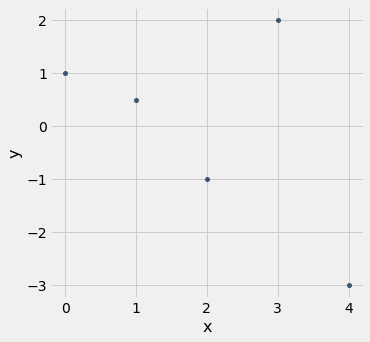

In [16]:
d = Table().with_columns(
    'x', make_array(0,  1,  2,  3,  4),
    'y', make_array(1, .5, -1,  2, -3))
d.scatter('x')


#### Question 1 (Ungraded, but you'll need the result later)
Running the cell below will generate sliders that control the slope and intercept of a line through the scatter plot.  When you adjust a slider, the line will move.

By moving the line around, make your best guess at the least-squares regression line.  (It's okay if your line isn't exactly right, as long as it's reasonable.)

**Note:** Python will probably take about a second to redraw the plot each time you adjust the slider.  We suggest clicking the place on the slider you want to try and waiting for the plot to be drawn; dragging the slider handle around will cause a long lag.

In [17]:
def plot_line(slope, intercept):
    plt.figure(figsize=(5,5))
    
    endpoints = make_array(-2, 7)
    p = plt.plot(endpoints, slope*endpoints + intercept, color='orange', label='Proposed line')
    
    plt.scatter(d.column('x'), d.column('y'), color='blue', label='Points')
    
    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

interact(plot_line, slope=widgets.FloatSlider(min=-4, max=4, step=.1), intercept=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='slope', max=4.0, min=-4.0), FloatSlider(value=0.0, description='intercept', max=4.0, min=-4.0), Output()), _dom_classes=('widget-interact',))

<div class="hide">\pagebreak</div>

You can probably find a reasonable-looking line by just eyeballing it.  But remember: the least-squares regression line minimizes the mean of the squared errors made by the line for each point.  Your eye might not be able to judge squared errors very well.

#### A note on mean and total squared error

It is common to think of the least-squares line as the line with the least *mean* squared error (or the square root of the mean squared error), as the textbook does.

But it turns out that it doesn't matter whether you minimize the mean squared error or the *total* squared error.  You'll get the same best line in either case.

That's because the total squared error is just the mean squared error multipled by the number of points (`d.num_rows`).  So if one line gets a better total squared error than another line, then it also gets a better mean squared error.  In particular, the line with the smallest total squared error is also better than every other line in terms of mean squared error.  That makes it the least squares line.

**tl; dr:** Minimizing the mean squared error minimizes the total squared error as well.

#### Question 2 (Ungraded, but you'll need the result later)
The next cell produces a more useful plot.  Use it to find a line that's closer to the least-squares regression line, keeping the above note in mind.

In [18]:
def plot_line_and_errors(slope, intercept):
    plt.figure(figsize=(5,5))
    points = make_array(-2, 7)
    p = plt.plot(points, slope*points + intercept, color='orange', label='Proposed line')
    ax = p[0].axes
    
    predicted_ys = slope*d.column('x') + intercept
    diffs = predicted_ys - d.column('y')
    for i in np.arange(d.num_rows):
        x = d.column('x').item(i)
        y = d.column('y').item(i)
        diff = diffs.item(i)
        
        if diff > 0:
            bottom_left_x = x
            bottom_left_y = y
        else:
            bottom_left_x = x + diff
            bottom_left_y = y + diff
        
        ax.add_patch(patches.Rectangle(make_array(bottom_left_x, bottom_left_y), abs(diff), abs(diff), color='red', alpha=.3, label=('Squared error' if i == 0 else None)))
        plt.plot(make_array(x, x), make_array(y, y + diff), color='red', alpha=.6, label=('Error' if i == 0 else None))
    
    plt.scatter(d.column('x'), d.column('y'), color='blue', label='Points')
    
    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

interact(plot_line_and_errors, slope=widgets.FloatSlider(min=-4, max=4, step=.1), intercept=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='slope', max=4.0, min=-4.0), FloatSlider(value=0.0, description='intercept', max=4.0, min=-4.0), Output()), _dom_classes=('widget-interact',))

#### Question 3
Describe the visual criterion you used to find a line in question 2.  (For example, a possible (but incorrect) answer is, "I tried to make the red line for the bottom-right point as small as possible.")

I first set the slope such that the line followed the general trend of the data (negative, in the case above). Then, I adjusted the y-intercept such that the size of the squares are generally uniform and that there are no excessively large squares.

#### Question 4
We can say that a point influences the line by how much the line would move if the point were removed from the data set. Does the point at (3, 2) have more or less influence than any other point on the location of the line? 

The point (3,2) has more influence than any other point as the other points all generally lie on the same trend, with (3, 2) being much farther away. This point would push the trend line up, moreso than the others.

Now, let's have Python find this line for us.  When we use `minimize`, Python goes through a process similar to the one you might have used in question 2.

But Python can't look at a plot that displays errors!  Instead, we tell it how to find the total squared error for a line with a given slope and intercept.

#### Question 5
Define a function called `total_squared_error`.  It should take two numbers as arguments:

1. the slope of some potential line
2. the intercept of some potential line

It should return the total squared error when we use that line to make predictions for the dataset `d`.

In [21]:
def total_squared_error(slope, intercept):
    # Hint: The staff answer computed an array called predictions
    # and an array called errors first.
    predictions = slope*d.column('x') + intercept
    errors = (predictions - d.column('y'))**2
    return np.sum(errors)

In [22]:
_ = ok.grade('q2_5')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/YEoJOW
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 6
What is the total squared error for the line you found by "eyeballing" the errors in Question 1?  What about Question 2, where you made a guess that was "aided" by a visualization of the squared error?  (It's okay if the error went up, but for many students, the error will go down when using the visual aid.)

In [23]:
eyeballed_error = total_squared_error(-0.9, 2.1)
aided_error = total_squared_error(-0.6, 1.3)
print("Eyeballed error:", eyeballed_error, "\nAided error:", aided_error)

Eyeballed error: 12.4 
Aided error: 11.2


In [24]:
_ = ok.grade('q2_6')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/68LwPz
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 7
Use `minimize` to find the slope and intercept for the line that minimizes the total squared error. This is the definition of a least-squares regression line. 

**Note:** `minimize` will return a single array containing the slope as the first element and intercept as the second. Read more of its documentation [here](http://data8.org/datascience/util.html?highlight=minimize#datascience.util.minimize).

In [25]:
# The staff solution used 1 line of code above here.
slope, intercept = minimize(total_squared_error)
slope_from_minimize = slope
intercept_from_minimize = intercept
print("Least-squares regression line: predicted_y =",
      slope_from_minimize,
      "* x + ",
      intercept_from_minimize)

Least-squares regression line: predicted_y = -0.649837423157 * x +  1.1988619621


In [26]:
_ = ok.grade('q2_7')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/G6ykp3
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 8
What was the total squared error for that line?

In [27]:
best_total_squared_error = total_squared_error(slope, intercept)
best_total_squared_error

10.975003568216033

In [28]:
_ = ok.grade('q2_8')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/QWZxDZ
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Finally, run the following cell to plot this "best fit" line and its errors:

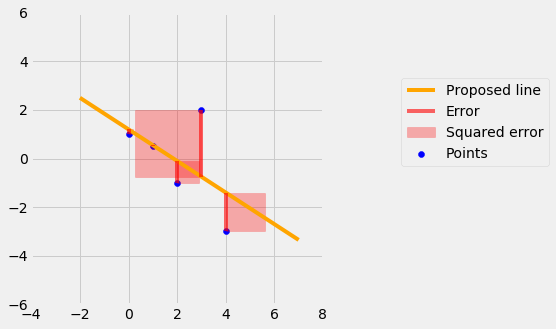

In [29]:
plot_line_and_errors(slope_from_minimize, intercept_from_minimize)

## 3. Triple Jump Distances vs. Vertical Jump Heights


Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (an horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distance in both jump activities was measured in centimeters. Run the cell below to load the data.

In [30]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


#### Question 1
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows the regression line**. 

See the [documentation for `scatter`](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

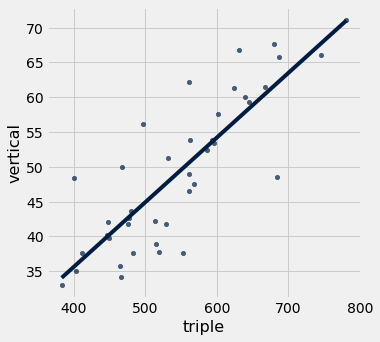

In [31]:
jumps.scatter("triple", "vertical", fit_line = True)

**Question 2** Does the correlation coefficient `r` look closer to 0, .5, or -.5? Explain. 

r looks to be closer to 0.5 that any of the others as the data points generally clump around the regression line and are in a positive trend.

#### Question 3
Create a function called `regression_parameters`. It takes as its argument a table with two columns.  The first column is the x-axis, and the second column is the y-axis.  It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line.

In [32]:
def regression_parameters(t):
    x_SU = standard_units(t.column(0))
    y_SU = standard_units(t.column(1))
    x_SD = np.std(t.column(0))
    y_SD = np.std(t.column(1))
    # Our solution had 4 lines above this one; you may use more than that
    r = np.mean(x_SU * y_SU)
    slope = r * (y_SD/x_SD)
    intercept = np.mean(t.column(1)) - slope * np.mean(t.column(0))
    return make_array(r, slope, intercept)

# When your function is finished, the next lines should
# compute the regression line predicting vertical jump 
# distances from triple jump distances.
parameters = regression_parameters(jumps)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837598 ; slope: 0.09295728160512184 ; intercept: -1.566520972963474


In [33]:
_ = ok.grade('q3_3')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/v2KMPM
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4
Let's use `regression_parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [34]:
#18.29 meters = 1829 cm; triple jump on x-axis
# Y = intercept + slope * 1829
triple_record_vert_est = parameters.item(2) + parameters.item(1) * 1829
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


In [35]:
_ = ok.grade('q3_4')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/pYrDJy
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 5
Do you expect this estimate to be accurate within a few centimeters? (Hint: compare Edwards' triple jump distance to the triple jump distances in `jumps`. Is it relatively similar to the rest of the data?) Why or why not?

I would not expect this estimate to be accurate within a few centimeters as Edwards' triple jump distance is far greater than any of the others in the jumps table, which means that his data point is an outlier. The linear regression line is only useful in finding association between data points near that of the scatter plot, and not to extrapolate association over outliers.

## 4. The Bootstrap and The Normal Curve


In this exercise, we will explore a dataset that includes the safety inspection scores for restauraunts in the city of Austin, Texas.  We will be interested in determining the average restaurant score (out of 100) for the city from a random sample of the scores.  We'll compare two methods for computing a confidence interval for that quantity: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [36]:
# Just run this cell.
pop_restaurants = Table.read_table('restaurant_inspection_scores.csv').drop(5,6)
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


#### Question 1 (Ungraded)
Plot a histogram of the scores.

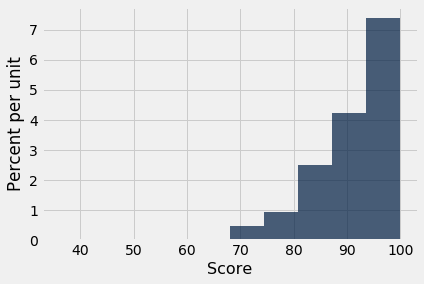

In [37]:
# Write your code here.
pop_restaurants.hist("Score")

This is the population mean:

In [38]:
pop_mean = np.mean(pop_restaurants.column(3))
pop_mean

91.407066934788858

Often it is impossible to find complete datasets like this.  Imagine we instead had access only to a random sample of 100 restaurants, called `restaurant_sample`.  That table is created below. We are interested in using this sample to estimate the population mean.

In [39]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
Conans Pizza - South,78745,05/04/2016,91,"2018 W STASSNEY LN AUSTIN, TX 78745 (30.215999, -97.798413)"
Courtyard Marriott,78759,08/15/2014,94,"9409 STONELAKE BLVD AUSTIN, TX 78759 (30.385685, -97.739969)"
Jack in the Box #865,78752,11/27/2013,100,"6419 AIRPORT BLVD AUSTIN, TX 78752 (30.329371, -97.715771)"
Spoon & Company,78745,06/12/2015,100,"1606 W STASSNEY LN Unit 1 AUSTIN, TX 78745 (30.213367, - ..."
Whole Foods Market - Grocery,78749,09/30/2014,92,"4301 W WILLIAM CANNON DR Bldg B AUSTIN, TX 78749 (30.221 ..."
"French Quarter Grille, The",78753,03/20/2015,78,"13000 N IH 35 SVRD SB Bunit 600 AUSTIN, TX 78753 (30.408 ..."
BC - ThunderCloud Subs,78738,11/24/2015,98,"12400 W SH 71 Unit 706 BEE CAVE, TX 78738 (30.303625, -9 ..."
F & F Fruit Cups,78752,09/16/2014,85,"7110 CAMERON RD Bldg D AUSTIN, TX 78752 (30.325667, -97. ..."
"Spec's Wine, Liquor & Fine Foods",78752,08/06/2014,94,"5775 AIRPORT BLVD AUSTIN, TX 78752 (30.321938, -97.714104)"
Tokyo Gardens,78753,02/20/2015,100,"500 CANYON RIDGE DR AUSTIN, TX 78753 (30.403174, -97.672212)"


#### Question 2 (Ungraded)
Plot a histogram of the **sample** scores. 

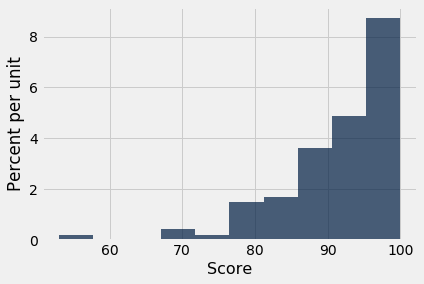

In [40]:
# Write your code here:
restaurant_sample.hist("Score")

This is the **sample mean**:

In [41]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_mean

91.719999999999999

#### Question 3
Complete the function `bootstrap_scores` below. It should take no arguments. It should simulate drawing 5000 resamples from `restaurant_sample` and computing the mean restaurant score in each resample.  It should return an array of those 5000 resample means.

In [42]:
def bootstrap_scores():
    resampled_means = make_array()
    for i in range(5000):
        new_sample = restaurant_sample.sample(with_replacement = True)
        resampled_mean = np.mean(new_sample.column(3))
        resampled_means = np.append(resampled_means, resampled_mean)
    return resampled_means

resampled_means = bootstrap_scores()
resampled_means

array([ 91.82,  91.96,  90.48, ...,  90.72,  91.4 ,  91.41])

In [43]:
_ = ok.grade('q4_3')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw07/backups/5yJvBX
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Take a look at the histogram of the **resampled means**.

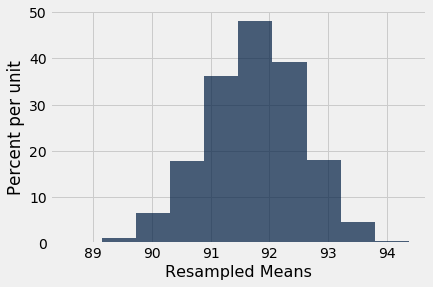

In [44]:
Table().with_column('Resampled Means',resampled_means).hist()

#### Question 4
Compute a 95 percent confidence interval for the average restaurant score using the array `resampled_means`.

In [48]:
lower_bound = percentile(2.5, resampled_means)
upper_bound = percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 90.06 , 93.25 )


#### Question 5
Does the distribution of the resampled mean scores look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

Yes, this result is expected due to the Central Limit Theorem as even though the original distribution is not normally distributed, a large sample of the means from this distribution will have a normal distribution.

#### Question 6
Does the distribution of the **sample scores** (notice we're no longer talking about the resampled means) look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

No, as the sample scores are just a random sample of scores from the original population, not their means or sums. Thus the Central Limit Theorem does not apply and we can expect that the result would not be normally distributed.

For the last question, you'll need to recall two facts.
1. If a group of numbers has a normal distribution, around 95% of them lie within 2 standard deviations of their mean.
2. The Central Limit Theorem tells us the quantitative relationship between
    * the standard deviation of an array of numbers and
    * the standard deviation of an array of means of samples taken from those numbers.

#### Question 7
Without referencing the array `resampled_means` or performing any new simulations, calculate an interval around the `sample_mean` that covers approximately 95% of the numbers in the `resampled_means` array.  **You may use the following values to compute your result, but you should not perform additional resampling** - think about how you can use the CLT to accomplish this.

In [49]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_sd = np.std(restaurant_sample.column(3))
sample_size = restaurant_sample.num_rows

sample_means_SD = sample_sd/np.sqrt(sample_size)
lower_bound_normal = sample_mean - 2 * sample_means_SD
upper_bound_normal = sample_mean + 2 * sample_means_SD
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 90.0632368908 , 93.3767631092 )


This confidence interval should look very similar to the one you computed in question 5. If not, try calculating the inner 95 percent using 1.96 standard deviations instead of 2, for a more precise calculation. If they are still very different, there may be an error in your code.